In [2]:
import numpy as np
from numpy.linalg import matrix_power
from scipy.linalg import hadamard
import matplotlib.pyplot as plt

In [3]:
ket0 = np.array([1,0,0])
ket1 = np.array([0,1,0])
ket2 = np.array([0,0,1])

out00 = np.outer(ket0,ket0)
out01 = np.outer(ket0,ket1)
out02 = np.outer(ket0,ket2)
out10 = np.outer(ket1,ket0)
out11 = np.outer(ket1,ket1)
out12 = np.outer(ket1,ket2)
out20 = np.outer(ket2,ket0)
out21 = np.outer(ket2,ket1)
out22 = np.outer(ket2,ket2)

In [26]:
def shift(n, Hp):
    upshift = np.zeros(shape=(Hp,Hp)) #HpxHp matrix 
    for i in range(Hp):
        v1 = np.zeros(Hp) 
        v1[(i+1)%(Hp)] = 1 #|i + 1⟩ 
        v2 = np.zeros(Hp)
        v2[i] = 1 #⟨i|
        upshift += np.outer(v1,v2) #|i + 1⟩ ⟨i|

    up = np.kron(upshift,out00) 

    stayshift = np.eye(Hp)
    stay = np.kron(stayshift,out11) 

    downshift = np.zeros(shape=(Hp,Hp)) #HpxHp matrix 
    for i in range(Hp):
        v1 = np.zeros(Hp) 
        v1[(i-1)%(Hp)] = 1 #|i - 1⟩ 
        v2 = np.zeros(Hp)
        v2[i] = 1 #⟨i|
        downshift += np.outer(v1,v2) #|i - 1⟩ ⟨i|

    down = np.kron(downshift,out22) 

    return up + down + stay

In [1]:
def walk(t, b):

    Hp = 2*t + 1 #Position Hilbert Space
    Hc = 3 #Coin Hilbert Space

    pos_0 = np.zeros(Hp)
    pos_0[t] = 1 #Central starting position

    state_i = np.kron(pos_0, b) #b = initial spin state

    Grover = (-out00 + 2*out01 + 2*out02 + 2*out10 - out11 + 2*out12 + 2* out20 + 2*out21 - out22) / 3
    C = np.kron(np.eye(Hp),Grover) #Coin = Hadamard

    U = np.dot(shift(t, Hp),C)

    pos_f = matrix_power(U,t).dot(state_i)

    l = Hp-1//2
    ComPos = np.zeros(Hp)
    for i in range(Hp):
        ComPos[i] = abs(pos_f[3*i])**2 + abs(pos_f[3*i+1])**2 + abs(pos_f[3*i+2])**2 #probability of spin up + down in position i

    return ComPos

In [13]:
def norm(t, Hp, compos):
    norm = 0
    ComPos = compos 
    k = 3**(4*t)
    for i in range(Hp):
        norm += ComPos[i] 
    print(norm)
    return norm

In [27]:
def plot(t, b, sf, getnorm, getpos):

    Hp = 2*t + 1

    xpos2 = np.zeros(Hp)
    for i in range(0,Hp):
        xpos2[i] = i-t 

    compos = walk(t, b)

    plotnorm = norm(t, Hp, compos)

    plt.plot(xpos2, (compos), '-b.', linewidth=0.25, markersize=1)
    plt.xlabel("Position")
    plt.ylabel("Probability")
    plt.xlim([-t, t])
    plt.ylim(bottom = 0)
    plt.figtext(.5, .9, r"$t = {}$".format(t), fontsize = 'x-small')
    plt.figtext(.65, .9, r"$norm = {}$".format(plotnorm), fontsize = 'x-small')
    plt.figtext(0.15, 0.9, "Ψ0 = {}".format(b), fontsize = 'x-small')

    if sf == True:
        plt.savefig("1D_Qutrit_Grover_Lazy_t{}_{}.pdf".format(t,b,)) #save image

    if getpos == True:
        positions(t, Hp, compos) #display all positions

In [28]:
def positions(t, Hp, compos):
    ComPos = compos
    for i in range(Hp):
        print("Pos", i-t, "=", ComPos[i]) #print all positions

0.9999999999999959


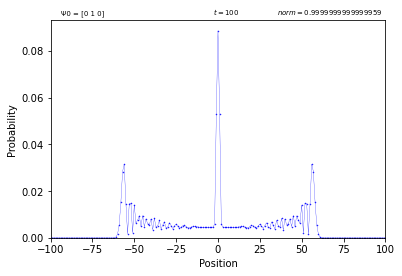

In [29]:
plot(100, ket1, sf = False, getnorm = True, getpos = False)

In [30]:
def localised(t,b,sf):
    pos_t_0 = np.zeros(t)

    for i in range(t):
        pos_t = walk(i,b)
        pos_t_0[i] = pos_t[i] 

    x = np.arange(0, t, 1, dtype=int)

    yfit1 = np.full((t, 1), (15-6*np.sqrt(6)))
    
    plt.plot(x,pos_t_0,'-b.', linewidth=0.25, markersize=1)
    plt.plot(x, yfit1, 'y--', label="y=15-6*sqrt(6)")
    #plt.ylim([0,1])
    plt.xlabel("T")
    plt.ylabel("Prob at Origin")
    plt.legend(loc='best')

    if sf == True:
        plt.savefig("0prob_t{}_{}.pdf".format(t,b))

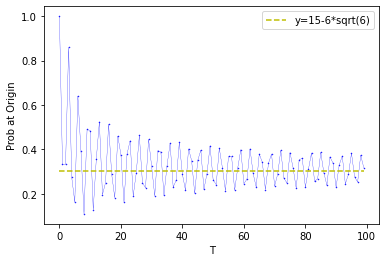

In [22]:
localised(100, (ket0+ket1+ket2)/np.sqrt(3), False)

In [24]:
def localised2(t,b,sf):
    pos_t_0 = np.zeros(t)

    for i in range(t):
        pos_t = walk(i,b)
        pos_t_0[i] = pos_t[i] 

    x = np.arange(1, t+1, 1, dtype=int)
    g = 1/x

    yfit1 = np.full((t, 1), (15-6*np.sqrt(6)))
    
    plt.plot(g,pos_t_0,'-b.', linewidth=0.25, markersize=1)
    plt.plot(g, yfit1, 'y--', label="y=15-6*sqrt(6)")
    plt.ylim([0.07,0.56])
    plt.xlim([0.0001,0.1])
    plt.xlabel("1/T")
    plt.ylabel("Prob at Origin")
    plt.legend(loc='best')

    if sf == True:
        plt.savefig("0prob_inv_t{}_{}.pdf".format(t,b))

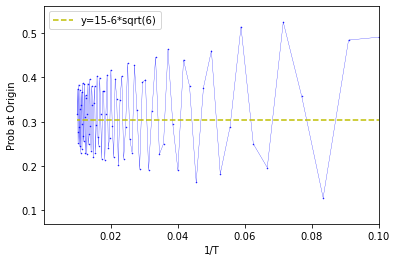

In [25]:
localised2(100, (ket0+ket1+ket2)/np.sqrt(3), True)